# Modeling and Simulation in Python

Rabbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [8]:
%matplotlib inline

from modsim import *

## Rabbit is Rich

This notebook starts with a version of the rabbit population growth model.  You will modify it using some of the tools in Chapter 5.  Before you attempt this diagnostic, you should have a good understanding of State objects, as presented in Section 5.4.  And you should understand the version of `run_simulation` in Section 5.7.

### Separating the `State` from the `System`

Here's the `System` object from the previous diagnostic.  Notice that it includes system parameters, which don't change while the simulation is running, and population variables, which do.  We're going to improve that by pulling the population variables into a `State` object.

In [9]:
system = System(t0 = 0, 
                t_end = 20,
                juvenile_pop0 = 0,
                adult_pop0 = 10,
                birth_rate = 0.9,
                mature_rate = 0.33,
                death_rate = 0.5)

system

,value
t0,0.00
t_end,20.00
juvenile_pop0,0.00
adult_pop0,10.00
birth_rate,0.90
mature_rate,0.33
death_rate,0.50


In the following cells, define a `State` object named `init` that contains two state variables, `juveniles` and `adults`, with initial values `0` and `10`.  Make a version of the `System` object that does NOT contain `juvenile_pop0` and `adult_pop0`, but DOES contain `init`.

In [10]:
# Solution goes here
init = State(juveniles=0,
            adults=10)
init

,value
juveniles,0
adults,10


In [11]:
# Solution goes here
system = System(init = init,
                t0 = 0, 
                t_end = 20,
                birth_rate = 0.9,
                mature_rate = 0.33,
                death_rate = 0.5)

system

,value
init,juveniles 0 adults 10 dtype: int64
t0,0
t_end,20
birth_rate,0.9
mature_rate,0.33
death_rate,0.5


### Updating `run_simulation`

Here's the version of `run_simulation` from last time:

In [12]:
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object
    """
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    
    for t in linrange(system.t0, system.t_end):
        maturations = system.mature_rate * juveniles[t]
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * adults[t]
        
        if adults[t] > 30:
            market = adults[t] - 30
        else:
            market = 0
            
        juveniles[t+1] = juveniles[t] + births - maturations
        adults[t+1] = adults[t] + maturations - deaths - market
        
    system.adults = adults
    system.juveniles = juveniles


In the cell below, write a version of `run_simulation` that works with the new `System` object (the one that contains a `State` object named `init`).

Hint: you only have to change two lines.

In [6]:
# Solution goes here
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object
    """
    juveniles = TimeSeries()
    juveniles[system.t0] = init.juveniles
    
    adults = TimeSeries()
    adults[system.t0] = init.adults
    
    for t in linrange(system.t0, system.t_end):
        maturations = system.mature_rate * juveniles[t]
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * adults[t]
        
        if adults[t] > 30:
            market = adults[t] - 30
        else:
            market = 0
            
        juveniles[t+1] = juveniles[t] + births - maturations
        adults[t+1] = adults[t] + maturations - deaths - market
        
    system.adults = adults
    system.juveniles = juveniles

Test your changes in `run_simulation`:

In [13]:
run_simulation(system)
system.adults

,value
0,10.000000
1,5.000000
2,5.470000
3,6.209900
4,7.057723
5,8.021560
6,9.117031
7,10.362107
8,11.777219
9,13.385586


### Plotting the results

Here's a version of `plot_results` that plots both the adult and juvenile `TimeSeries`.

In [14]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adults, 'bo-', label='adults')
    plot(system.juveniles, 'gs-', label='juveniles')
    decorate(xlabel='Season', 
             ylabel='Rabbit population',
             title=title)

If your changes in the previous section were successful, you should be able to run this new version of `plot_results`.

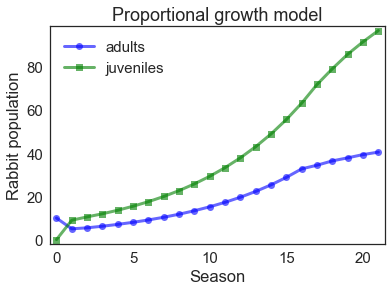

In [15]:
plot_results(system, title='Proportional growth model')

That's the end of the diagnostic.  If you were able to get it done quickly, and you would like a challenge, here are two bonus questions:


### Bonus question #1

Write a version of `run_simulation` that puts the results into a single `TimeFrame` named `results`, rather than two `TimeSeries` objects.

Write a version of `plot_results` that can plot the results in this form.

WARNING: This question is substantially harder, and requires you to have a good understanding of everything in Chapter 5.  We don't expect most people to be able to do this exercise at this point.

In [16]:
# Solution goes here
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object
    """
    frame = TimeFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        maturations = system.mature_rate * frame.juveniles[t]
        births = system.birth_rate * frame.adults[t]
        deaths = system.death_rate * frame.adults[t]
        
        if frame.adults[t] > 30:
            market = frame.adults[t] - 30
        else:
            market = 0
            
        frame.juveniles[t+1] = frame.juveniles[t] + births - maturations
        frame.adults[t+1] = frame.adults[t] + maturations - deaths - market
        
    system.adults = frame.adults
    system.juveniles = frame.juveniles

In [17]:
frame = TimeFrame(columns=system.init.index)
frame.loc[system.t0] = system.init
frame

,juveniles,adults
0,0.0,10.0


In [18]:
run_simulation(system)

In [19]:
# Solution goes here
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adults, 'bo-', label='adults')
    plot(system.juveniles, 'gs-', label='juveniles')
    decorate(xlabel='Season', 
             ylabel='Rabbit population',
             title=title)

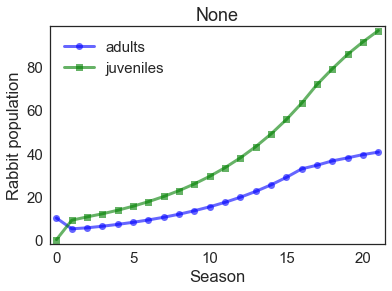

In [20]:
plot_results(system)

### Bonus question #2

Factor out the update function.

1.  Write a function called `update` that takes a `State` object and a `System` object and returns a new `State` object that represents the state of the system after one time step.

2.  Write a version of `run_simulation` that takes an update function as a parameter and uses it to compute the update.

3.  Run your new version of `run_simulation` and plot the results.

WARNING: This question is substantially harder, and requires you to have a good understanding of everything in Chapter 5.  We don't expect most people to be able to do this exercise at this point.

In [ ]:
# Solution goes here
def update(state, system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object
    """
    frame = TimeFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        maturations = system.mature_rate * frame.juveniles[t]
        births = system.birth_rate * frame.adults[t]
        deaths = system.death_rate * frame.adults[t]
        
        if frame.adults[t] > 30:
            market = frame.adults[t] - 30
        else:
            market = 0
            
        frame.juveniles[t+1] = frame.juveniles[t] + births - maturations
        frame.adults[t+1] = frame.adults[t] + maturations - deaths - market
        
    system.adults = frame.adults
    system.juveniles = frame.juveniles


In [ ]:
#run_simulation(system, update)

In [ ]:
#plot_results(system)